## 1D rpm read

In [6]:
import os, csv
import numpy as np
import torch

# Reading RPM #
with open('/workspace/data/Diagram_Coordinates/1D_rpm.csv', 'r', encoding='utf-8-sig') as f:  # 使用'utf-8-sig'来自动处理BOM
    data = list(csv.reader(f, delimiter=","))        
RPM = np.array(data)
RPM = np.float32(RPM)

select_seq = RPM[:6, [1, 3, 5, 7]]
RPM_X = select_seq[:, :-1]
print(RPM_X)
RPM_Y = select_seq[:, 1:]
print(RPM_Y)

[[24. 25. 28.]
 [37. 42. 42.]
 [21. 28. 29.]
 [12. 17. 21.]
 [21. 24. 27.]
 [37. 40. 42.]]
[[25. 28. 28.]
 [42. 42. 40.]
 [28. 29. 27.]
 [17. 21. 17.]
 [24. 27. 25.]
 [40. 42. 41.]]


In [4]:
import os, csv
import numpy as np
import torch

# Reading RPM #
with open('/workspace/data/Diagram_Coordinates/1D_rpm.csv', 'r', encoding='utf-8-sig') as f:  # 使用'utf-8-sig'来自动处理BOM
    data = list(csv.reader(f, delimiter=","))        
RPM = np.array(data)
RPM = np.float32(RPM)

select_seq = RPM[5, [1, 3, 5, 7]]
RPM_X = select_seq[:-1]
print(RPM_X)
RPM_Y = select_seq[1:]
print(RPM_Y)

[37. 40. 42.]
[40. 42. 41.]


In [25]:
RPM_X_tensor = torch.Tensor(RPM_X)
RPM_Y_tensor = torch.Tensor(RPM_Y)
RPM_X_tensor.cuda()
RPM_Y_tensor.cuda()

tensor([[25., 28., 28.],
        [42., 42., 40.],
        [28., 29., 27.],
        [17., 21., 17.],
        [24., 27., 25.]], device='cuda:0')

In [9]:
test_x_rpm = np.random.rand(1, 7) 
test_x_rpm

array([[0.83645042, 0.53475235, 0.72372967, 0.8460796 , 0.54394486,
        0.96691868, 0.66363474]])

In [29]:
for t in range(3):
    print(t)

0
1
2


In [30]:
for t in range(3-1, -1, -1): 
    print(t)

2
1
0


## Draw graph

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# First we create a DataFrame from the data provided in the image.
data = {
    'Fold': [1, 2, 3, 4, 5, 6],
    'SSIM: 1 3 5': [0.8915, 0.8354, 0.8908, 0.8893, 0.9577, 0.9545],
    'SSIM: 2 4 6': [0.8718, 0.8445, 0.9252, 0.8735, 0.9613, 0.9505],
    'SSIM: 5 7 9': [0.881, 0.8587, 0.9158, 0.8995, 0.9537, 0.9583],
    'SSIM: 6 8 10': [0.869, 0.8442, 0.9275, 0.8745, 0.9631, 0.9566]
}
df = pd.DataFrame(data)
df.set_index('Fold', inplace=True)

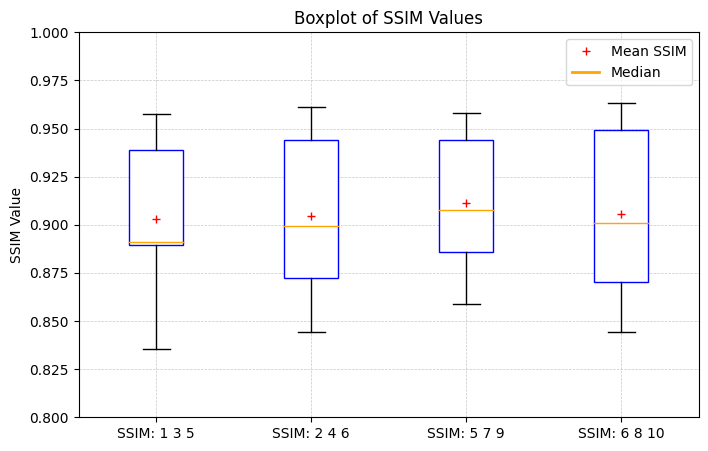

In [11]:
# Modify the provided code to replicate the style of the uploaded boxplot with a legend for the mean
plt.figure(figsize=(8, 5))

# Defining properties for the boxplot
boxprops = dict(linestyle='-', linewidth=1, color='blue')
meanpointprops = dict(marker='+', markeredgecolor='red', markerfacecolor='red')

# Creating the boxplot with mean points
boxplot_elements = plt.boxplot([df['SSIM: 1 3 5'], df['SSIM: 2 4 6'], df['SSIM: 5 7 9'], df['SSIM: 6 8 10']],
                               notch=False,
                               widths=0.35,
                               patch_artist=True,
                               showmeans=True,
                               meanprops=meanpointprops,
                               medianprops=dict(color="orange", linewidth=1), # median setting
                               boxprops=boxprops)

# Fill the boxes with color for better visual distinction
for patch in boxplot_elements['boxes']:
    patch.set_facecolor('white')

# Set the labels and titles
# plt.xticks([1, 3], ['SSIM: 1 3 5', 'SSIM: 5 7 9'])
plt.xticks(range(1, len(df.columns)+1), df.columns[0:])
# ['SSIM: 1 3 5', 'SSIM: 5 7 9', 'SSIM: 0 2 4', 'SSIM: 4 6 8']
plt.title('Boxplot of SSIM Values')
plt.ylabel('SSIM Value')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adding a legend for mean
plt.plot([], [], '+', color='red', label='Mean SSIM')
plt.plot([], [], color='orange', label='Median', linewidth=2)
plt.legend()

# Set the y-axis to start from 0
plt.ylim(0.8,1)

# Show the plot with mean points indicated
plt.show()